__Goal__ 

Test:
- MC e-soft normal reward
- MC e-soft custom reward
- SARSA 
- 6-step SARSA
- exp-SARSA
- Q-Learning

10,000 episodes, average of 10 trials

In [1]:
from discretize import discretize
from collections import defaultdict
from monte_carlo import *
from q_io import *
from tqdm import trange
from td_methods import *
import gymnasium as gym
from plots import *

In [2]:
epsilon = 0.04
num_episodes = 16_000
gamma = 0.95
num_to_avg = 10
step_size = 0.5
env = gym.make('CartPole-v1')
seed = 123

In [3]:
# # SARSA
sarsa_ep_lengths = []

for i in range(num_to_avg):
    array = load_array(f'comparison/sarsa_ep_lengths_{i}.txt')
    sarsa_ep_lengths.append(array)

In [4]:
# # 20-step SARSA
six_step_sarsa_ep_lengths = []

for i in range(num_to_avg):
    array = load_array(f'comparison/n_step_sarsa_ep_lengths_{i}.txt')
    six_step_sarsa_ep_lengths.append(array[0:10000])

In [5]:
# # 20-step SARSA
twenty_step_sarsa_ep_lengths = []


for i in range(num_to_avg):
    array = load_array(f'comparison/twenty_step_sarsa_ep_lengths_16000{i}.txt')
    twenty_step_sarsa_ep_lengths.append(array[0:10000])

In [6]:
# # Expected SARSA
exp_sarsa_ep_lengths = []

for i in range(num_to_avg):
    array = load_array(f'comparison/exp_sarsa_ep_lengths_{i}.txt')
    exp_sarsa_ep_lengths.append(array)


In [7]:
# Q-Learning
q_learning_ep_lengths = []

for i in range(num_to_avg):
    array = load_array(f'comparison/q_learning_ep_lengths_16000_{i}.txt')
    q_learning_ep_lengths.append(array)
    

In [8]:
# Monte Carlo Default Reward
mc_e_soft_ep_lengths_default = []

# 10,000 episodes - 10 runs - epsilon = 0.04 - gamma = 0.95 - step_size = 0.5
for i in range(num_to_avg):
    array = load_array(f'comparison/mc_default_ep_lengths_16000_{i}.txt')
    mc_e_soft_ep_lengths_default.append(array)


In [9]:
# Monte Carlo Default Reward
mc_e_soft_ep_lengths_custom = []

# 10,000 episodes - 10 runs - epsilon = 0.04 - gamma = 0.95 - step_size = 0.5
for i in range(num_to_avg):
    array = load_array(f'comparison/mc_custom_ep_lengths_16000_{i}.txt')
    mc_e_soft_ep_lengths_custom.append(array)


In [10]:
# # inf-step SARSA
inf_step_sarsa_ep_lengths = []

# even n-step with n=1000 isnt exactly MC because the step size parameter is different than 1/N for MC

# np.random.seed(seed)
# env.reset(seed=seed)
# for i in range(num_to_avg):
#     Q, policy, ep_lengths = nstep_sarsa(env=env, epsilon=epsilon, step_size=step_size, num_eps=num_episodes, gamma=gamma, n=500)
#     inf_step_sarsa_ep_lengths.append(ep_lengths)
#     save_array(ep_lengths, f'td_comparison_only/inf_step_sarsa_ep_lengths_10000_{i}.txt')

for i in range(num_to_avg):
    array = load_array(f'td_comparison_only/inf_step_sarsa_ep_lengths_10000_{i}.txt')
    inf_step_sarsa_ep_lengths.append(array)

In [11]:
# # DQN
dqn_ep_lengths = []

array = load_array(f'dqn_results/cartpole_dqn_lengths.csv')
dqn_ep_lengths.append(array)

In [12]:
# small CNN DQN
small_cnn_ep_lengths = []

array = load_array(f'cartpole_cnn_lengths.csv')
small_cnn_ep_lengths.append(array)

In [13]:
# big CNN DQN
large_cnn_ep_lengths = []

array = load_array(f'cartpole_cnn_lengths_bigger.csv')
large_cnn_ep_lengths.append(array)

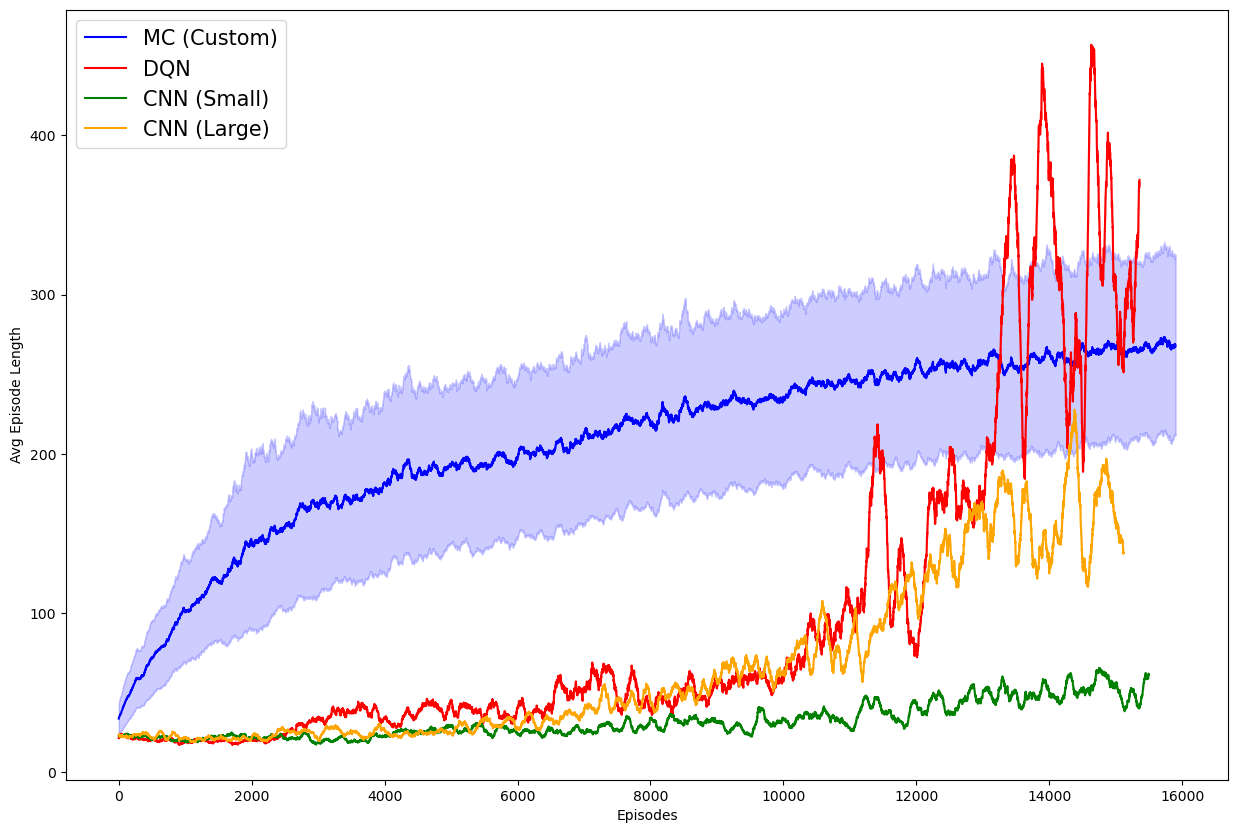

In [20]:
# plot_episode_lengths([sarsa_ep_lengths, six_step_sarsa_ep_lengths, twenty_step_sarsa_ep_lengths, exp_sarsa_ep_lengths, q_learning_ep_lengths], ['SARSA', '6-step SARSA', '20-step SARSA','Expected SARSA', 'Q-Learning'], smoothing=100, error_range=True, width=15, height=10)
# plot_episode_lengths([sarsa_ep_lengths, six_step_sarsa_ep_lengths, twenty_step_sarsa_ep_lengths], ['SARSA', '6-step SARSA', '20-step SARSA'], smoothing=100, error_range=True, width=15, height=10)
# plot_episode_lengths([mc_e_soft_ep_lengths_default, inf_step_sarsa_ep_lengths, q_learning_ep_lengths], ["MC-Control", "500-Step SARSA", "Q-Learning"], smoothing=100, width=15, height=10)
# plot_episode_lengths([mc_e_soft_ep_lengths_default, mc_e_soft_ep_lengths_custom, dqn_ep_lengths], ["MC-Control (Default)", "MC-Control (Custom)", "DQN"], smoothing=100, width=15, height=10)
plot_episode_lengths([mc_e_soft_ep_lengths_custom, dqn_ep_lengths, small_cnn_ep_lengths, large_cnn_ep_lengths], ["MC (Custom)", "DQN", "CNN (Small)", "CNN (Large)"], smoothing=100, width=15, height=10, fontsize=15)


In [15]:
# run_iterations(env=gym.make('CartPole-v1', render_mode='human'), Q=Q, n=5)